# GA DSIF 11 Capstone Project:

# Dance Move Classifier (Originality Never Dies) (Part 3)


## Lua Yeow Wen
---

## Data Modelling

### Install non built-in Python library

In [1]:
#!pip install tensorflow
#!pip install keras-tuner

### Import Libraries

In [2]:
# Standard Library Imports
import os
import time

# Data Handling and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imageio

# Machine Learning and Neural Network Libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import keras_tuner as kt
from sklearn.metrics import classification_report, multilabel_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping

# Computer Vision Libraries
import cv2
import mediapipe as mp

# IPython Display Tools
from IPython.display import Image, display

### Define File Paths

In [3]:
# Define file paths
current_directory = os.getcwd() # get current directory so that it is portable to other users
dataset_numpy_path = os.path.join(current_directory, "dataset_numpy")
moves_df_path = current_directory
save_model_path= os.path.join(current_directory, "models")


### Moves to be Detected

In [4]:
# Moves that we try to detect
moves = np.array(['jackhammer', 'handhop', 'cc'])


### Create Labels for the Moves

In [5]:
label_map = {label:num for num, label in enumerate(moves)}
label_map

{'jackhammer': 0, 'handhop': 1, 'cc': 2}

### Consolidate the Data into an Array

In [6]:
sequences, labels = [], []
for move in moves:
    for sequence in range(8):
        window = []
        for frame_num in range(60):
            res = np.load(os.path.join(dataset_numpy_path, move, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[move])

### Check the Shape of the Array

In [7]:
np.array(sequences).shape

#(24 3moves x 8 attempts, 60 frames, 15 landmarks*4 xyz visibility)

(24, 60, 60)

In [8]:
np.array(labels).shape

(24,)

In [9]:
np.array(labels)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2])

### Assign X and y

In [10]:
X = np.array(sequences)

In [11]:
X.shape

#(24 3moves x 8 attempts, 60 frames, 15 landmarks* 4 (x,y,z ,visibility)

(24, 60, 60)

In [12]:
X

array([[[ 0.33791661,  0.73737168, -0.31532425, ...,  0.66266811,
          0.2611815 ,  0.48594022],
        [ 0.30273899,  0.72206247, -0.2418119 , ...,  0.65784377,
          0.06320944,  0.53326768],
        [ 0.28559783,  0.71338332, -0.17423782, ...,  0.65389687,
          0.0374991 ,  0.57699376],
        ...,
        [ 0.38573322,  0.71247232, -0.33244959, ...,  0.68743682,
         -0.37084967,  0.86832333],
        [ 0.35721645,  0.71156275, -0.01165816, ...,  0.6544221 ,
         -0.29456586,  0.86970401],
        [ 0.37135303,  0.6658535 , -0.43481269, ...,  0.6380406 ,
         -0.16425847,  0.81408304]],

       [[ 0.40664354,  0.66629207,  0.69701779, ...,  0.60390919,
         -0.41469386,  0.98484069],
        [ 0.43350497,  0.64796728,  0.69581294, ...,  0.60760146,
         -0.24923249,  0.98618209],
        [ 0.43273109,  0.65316635,  0.62782753, ...,  0.6139127 ,
         -0.48354736,  0.98702687],
        ...,
        [ 0.74352938,  0.69988948,  0.1050111 , ...,  

In [13]:
# Label encode
y = to_categorical(labels).astype(int)

In [14]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [15]:
y.shape

#(24 3moves x 8 attempts, 3 classes)

(24, 3)

### Train Test Split

* 21 videos for training: 7 videos for each move

* 3 videos for testing: 1 videos for each move

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.125 ,random_state=42)

In [17]:
# 7 videos for each move x 3 = 21 ,60 frames, 15 landmarks* 4 (x,y,z ,visibility)
X_train.shape

(21, 60, 60)

In [18]:
# 1 videos for each move x 3 = 3 ,60 frames, 15 landmarks* 4 (x,y,z ,visibility)
X_test.shape

(3, 60, 60)

In [19]:
y_train.shape

(21, 3)

In [20]:
# 7 videos for each move
y_train

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [21]:
y_test.shape

(3, 3)

In [22]:
#1 videos for each move
y_test

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

**This dataset is balanced.**

### Data Scaling
Data scaling is not required as Mediapipe is able to handle scaling internally.

### Modelling
---
Two types of recurrent neural network (RNN) architectures will be used for the data modelling, Gated Recurrent Unit (GRU) and Long Short-Term Memory (LSTM) network. Variations such as different regularization techniques were applied to the two RNNs subsequently.

These two RNN architectures are designed to handle sequential data and can be applied to temporal/ time-series data.

**Sequential GRU Model (base model)** is chosen as the baseline model. The GRU has a simpler architecture compared to LSTM. It is adept at capturing less intricate patterns in data, outperforms with smaller datasets, and offers quicker training times on larger datasets ([source](https://medium.com/@prudhviraju.srivatsavaya/lstm-vs-gru-c1209b8ecb5a#:~:text=LSTM%3A%20LSTM%20typically%20has%20more,it%20lacks%20the%20forget%20gate.)). Additionally, GRUs are tailored for maintaining information across relatively shorter sequences than LSTMs.




### Models
---

#### GRU

* Model 1 - Sequential GRU Model **(base model)**
* Model 3 - Sequential GRU Model with Dropout Regularization
* Model 5 - Sequential GRU Model with EarlyStopping Regularization
* Model 7 - Sequential GRU Model with Dropout and EarlyStopping Regularization


#### LSTM

* Model 2 - Sequential LSTM Model
* Model 4 - Sequential LSTM Model with Dropout Regularization
* Model 6 - Sequential LSTM Model with EarlyStopping Regularization
* Model 8 - Sequential LSTM Model with Dropout and EarlyStopping Regularization


### Hyperparameters
---

Various hyperparameters will be considered, utilizing random_search_tuner to determine the optimal results from different combinations of hyperparameter values for each model. The model will be retrained with the optimal hyperparameters.



#### Hyperparameters Setup with Keras Tuner:

* n_hidden: Number of hidden layers in the network, ranging from 0 to 8. The default is set to 2.
* n_neurons: Number of neurons in each layer, ranging from 32 to 64.
* learning_rate: Step size for the optimizer, ranging from 0.001 and 0.002.
* optimizer: The choice of optimizer is either SGD (Stochastic Gradient Descent) or Adam optimizers.


### Layers
---


#### Model Initialization:

Sequential

#### First Layer (Input Layer):

The first layer added is of the type specified by model_type (RNN layer: LSTM or GRU). Its activation function is ReLU (Rectified Linear Unit). The input_shape is set to (60, 60), and return_sequences is set based on the number of hidden layers.



#### Hidden Layers:

Additional hidden layers are added in a loop. Each layer is the type model_type (RNN layer: LSTM or GRU) with n_neurons and uses the ReLU activation function. The return_sequences parameter is set dynamically to ensure that all layers except the last return the full sequence to the next layer.




#### Output Layer:

A Dense layer with a number of units equal to the length of moves (3 classes: {'jackhammer': 0, 'handhop': 1, 'cc': 2}) and using the softmax activation function. This function is used to convert model outputs into probabilities for each class. It ensures the probabilities add up to 1, helping identify the class with highest probability ([source](https://machinelearningmastery.com/softmax-activation-function-with-python/)). 




#### Model Compilation:

The model is compiled with the Categorical_crossentropy loss function, the chosen optimizer, and metrics set to monitor categorical_accuracy. This setup prepares the model for the training process with a focus on classification accuracy.


Categorical_crossentropy is used as a loss function for evaluating probability accuracy in action recognition models operating under a multi-class classification setting ([source](https://keras.io/api/losses/probabilistic_losses/)).


Categorical_accuracy is suitable for multi-class classification problems with categorical outputs ([source](https://keras.io/api/metrics/accuracy_metrics/)).






#### Trials in Hyperparameter Tuning:

max_trials is a parameter that specifies the maximum number of different hyperparameter combinations that the tuner will evaluate.

max_trials=10





### Regularization Techniques
---

Regularization techniques such as dropout and early stopping were added to the recurrent neural network subsequently as variations. This is to ensure the model is neither underfit nor overfit to the training data. 

Dropout ensures that no single neuron becomes overly dominant by randomly setting a fraction of the neurons to zero during training, making the model more robust.

Early stopping may indirectly speed up the modelling process by stopping training once the model ceases to improve, thus saving time that would otherwise be spent on unnecessary epochs. 




#### Dropout rate in Hyperparameter Tuning:

dropout_rate = 0.0/ 0.2/ 0.5




#### EarlyStopping Configuration:

* monitor: Set as 'val_loss' to prevent model from overfitting.
* patience: Set as 5 which means training will continue for 5 epochs beyond the point where the improvement stops.
* mode: Set as 'min' indicating that the training process should stop when the monitored quantity (validation loss in this case) stops decreasing.
* restore_best_weights: Set as True so that the model will retain the best learned weights even if the performance degraded in the epochs following that best epoch.


### Evaluation
---

#### Confusion Matrix for Each Class

Each matrix shows how well the model predicts each class compared to the others.

Class 1: jackhammer
Class 2: handhop
Class 3: cc'



* Top-left cell: True Positives (TP) 
* Top-right cell: False Positives (FP) 
* Bottom-left cell: False Negatives (FN)
* Bottom-right cell: True Negatives (TN)




### Metric of Success
---
Categorical accuracy (val_categorical_accuracy) with least model training time will be the metric used to evaluate the best performing model in a balanced dataset. Again, it is suitable for multi-class classification problems with categorical outputs.




In [23]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

### Create User Defined Function: rnn_model_run

* Explained in **Modelling** section.

In [24]:
def rnn_model_run(model_type, model_name, model_folder, model_result):


    # Build Model Function
    def build_model(hp):
        n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
        n_neurons = hp.Int("n_neurons", min_value=32, max_value=64)
        learning_rate = hp.Float("learning_rate", min_value=0.001, max_value=0.002, sampling="log")
        optimizer = hp.Choice("optimizer", values=["sgd", "adam"])

        if optimizer == "sgd":
            optimizer = SGD(learning_rate=learning_rate)
        else:
            optimizer = Adam(learning_rate=learning_rate)
            
        model = Sequential()

        # Add the first layer with input_shape
        model.add(model_type(n_neurons, return_sequences=n_hidden > 1, activation='relu', input_shape=(60, 60)))

        # Add other hidden layers
        for i in range(1, n_hidden):
            model.add(model_type(n_neurons, return_sequences=i < n_hidden - 1, activation='relu'))

        model.add(Dense(moves.shape[0], activation="softmax"))
        model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["categorical_accuracy"])
        
        return model

    # Start the timer
    start_time = time.time()

    # Hyperparameter Tuning
    random_search_tuner = kt.RandomSearch(build_model,
                                          objective='val_categorical_accuracy',
                                          max_trials=10,
                                          directory='my_dir',
                                          project_name=model_folder,
                                          seed=42)

    random_search_tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

    # Get the Best Trial Summary
    best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
    print("\nBest Trial Summary:")
    best_trial.summary()

    # Get Best Model
    best_model = random_search_tuner.get_best_models(num_models=1)[0]

    # Print the summary of the best model
    print("\nSummary of the Best Model:")
    best_model.summary()

    # Training the Best Model
    history = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

    # Stop the timer and calculate runtime
    end_time = time.time()
    runtime_seconds = end_time - start_time
    hours = int(runtime_seconds // 3600)
    minutes = int((runtime_seconds % 3600) // 60)
    seconds = int(runtime_seconds % 60)
    formatted_runtime = f"{hours:02d}:{minutes:02d}:{seconds:02d}"

    # Plotting Loss and Accuracy
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='navy')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='skyblue')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(history.history['categorical_accuracy'], label='Training Accuracy', color='navy')
    plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy', color='skyblue')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Predictions and Model Evaluation
    y_pred = best_model.predict(X_test)
    y_true = np.argmax(y_test, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    val_accuracy = accuracy_score(y_true, y_pred)
    print(classification_report(y_true, y_pred, target_names=moves, zero_division=0))
    print("Accuracy Score:", val_accuracy)
    print("Training Runtime: ", formatted_runtime)

    # Confusion Matrices
    confusion_matrices = multilabel_confusion_matrix(y_true, y_pred)
    num_classes = confusion_matrices.shape[0]

    for i in range(num_classes):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for Class {i+1}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    # Save Model
    model_save_filename = f"{model_name}.keras"
    model_save_path = os.path.join(save_model_path, model_save_filename)
    best_model.save(model_save_path)
    print(f"Model saved as {model_save_path}")

    # Append results to model_result DataFrame
    new_row = pd.DataFrame({
        'model': [model_name],
        'accuracy score': [val_accuracy],
        'run time': [formatted_runtime],  # Includes formatted runtime
        'saved model': [model_name + '.keras']
    })
    model_result = pd.concat([model_result, new_row], ignore_index=True)

    return best_model, model_result


### Sequential GRU Model (base model)

Trial 10 Complete [00h 00m 24s]
val_categorical_accuracy: 1.0

Best val_categorical_accuracy So Far: 1.0
Total elapsed time: 00h 03m 26s

Best Trial Summary:
Trial 02 summary
Hyperparameters:
n_hidden: 4
n_neurons: 40
learning_rate: 0.001970217438765675
optimizer: adam
Score: 1.0

Summary of the Best Model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 40)            12240     
                                                                 
 gru_1 (GRU)                 (None, 60, 40)            9840      
                                                                 
 gru_2 (GRU)                 (None, 60, 40)            9840      
                                                                 
 gru_3 (GRU)                 (None, 40)                9840      
                                                                 
 dense (Den

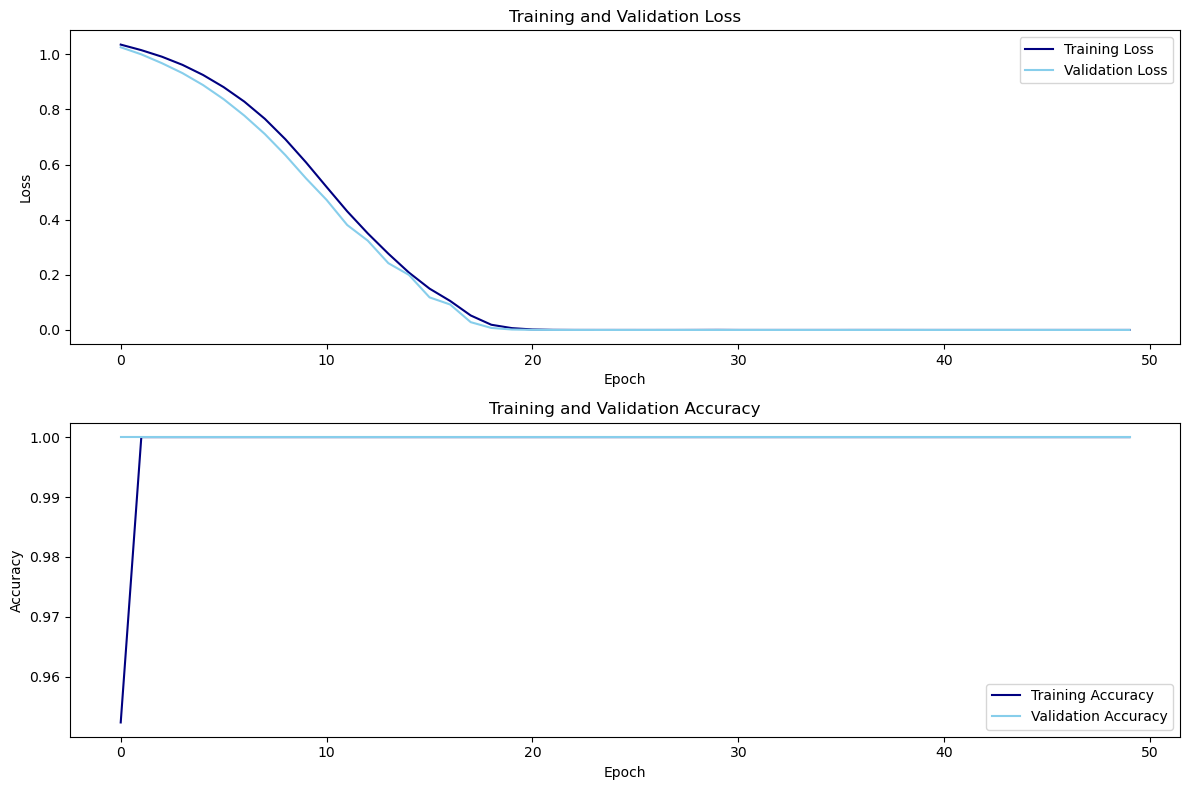

1/1 [==============================] - 1s 774ms/step
              precision    recall  f1-score   support

  jackhammer       1.00      1.00      1.00         1
     handhop       1.00      1.00      1.00         1
          cc       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Accuracy Score: 1.0
Training Runtime:  00:03:40


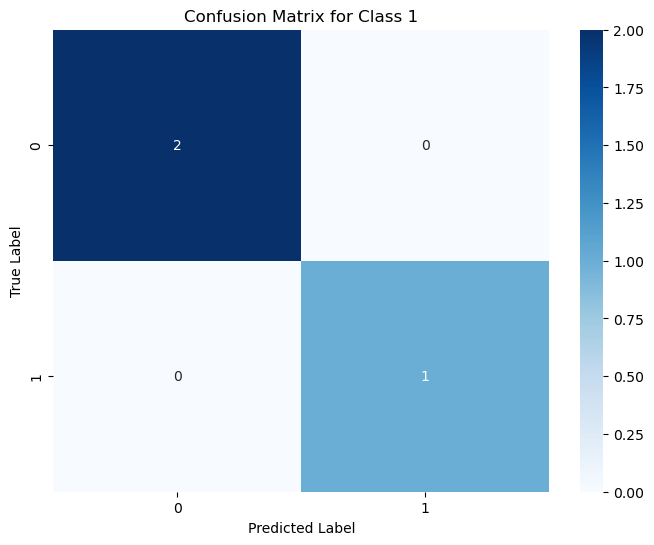

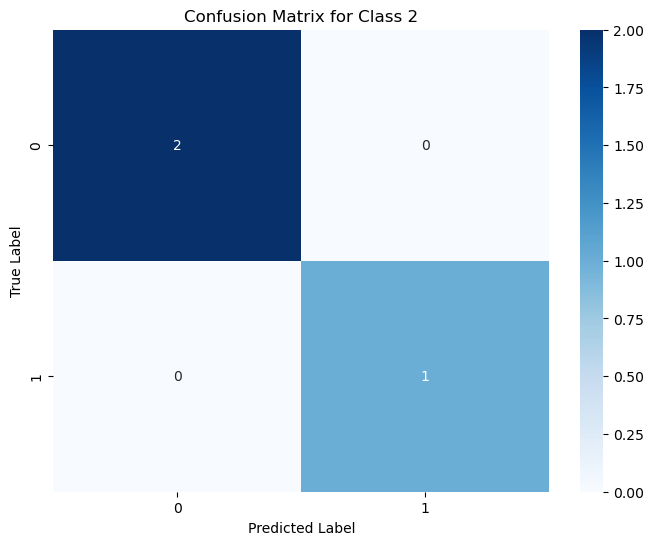

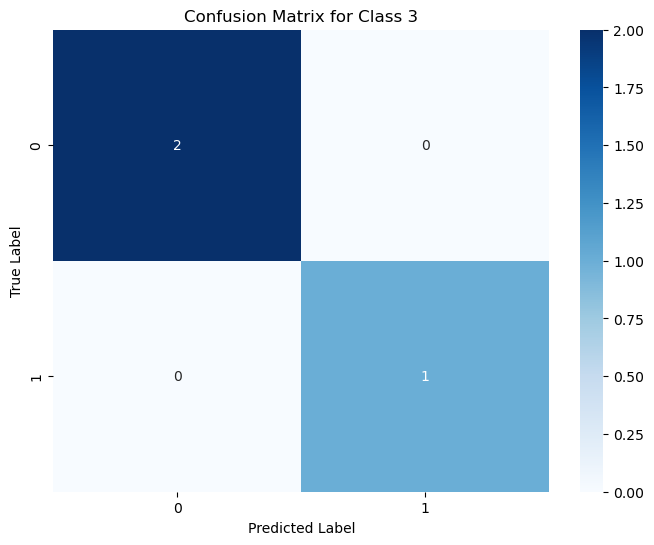

Model saved as C:\Users\Lua Yeow Wen\Documents\DSIF-SG-11\capstone\models\GRU Model.keras


In [25]:
# Prepare the DataFrame to store results
model_result_gru = pd.DataFrame(columns=['model', 'accuracy score', 'run time', 'saved model'])

# Run the function and update the DataFrame
#rnn_model_run(model_type, model_name, model_folder, model_result)
model, model_result_gru = rnn_model_run(GRU, 'GRU Model', 'GRU Model', model_result_gru)

In [26]:
model_result_gru

,model,accuracy score,run time,saved model
0,GRU Model,1.0,00:03:40,GRU Model.keras


**Findings for Sequential GRU Model (base model):**

* The accuracy is 100%

* The accuracy plot shows an almost perfect training accuracy from the beginning, which remains stable throughout the epochs. The validation accuracy also starts high and remains consistent. 

* The loss for both training and validation decreases over epochs, suggesting that the model is learning and improving its prediction over time. The training and validation loss lines are close together, which indicates that the model is generalizing well and not overfitting.

* All 3 classes of confusion matrix shows perfect accuracy results with 2 true negatives and 1 true positive.

### Sequential LSTM Model

Trial 10 Complete [00h 00m 24s]
val_categorical_accuracy: 0.6666666865348816

Best val_categorical_accuracy So Far: 1.0
Total elapsed time: 00h 03m 20s

Best Trial Summary:
Trial 02 summary
Hyperparameters:
n_hidden: 4
n_neurons: 40
learning_rate: 0.001970217438765675
optimizer: adam
Score: 1.0

Summary of the Best Model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 40)            16160     
                                                                 
 lstm_1 (LSTM)               (None, 60, 40)            12960     
                                                                 
 lstm_2 (LSTM)               (None, 60, 40)            12960     
                                                                 
 lstm_3 (LSTM)               (None, 40)                12960     
                                                              

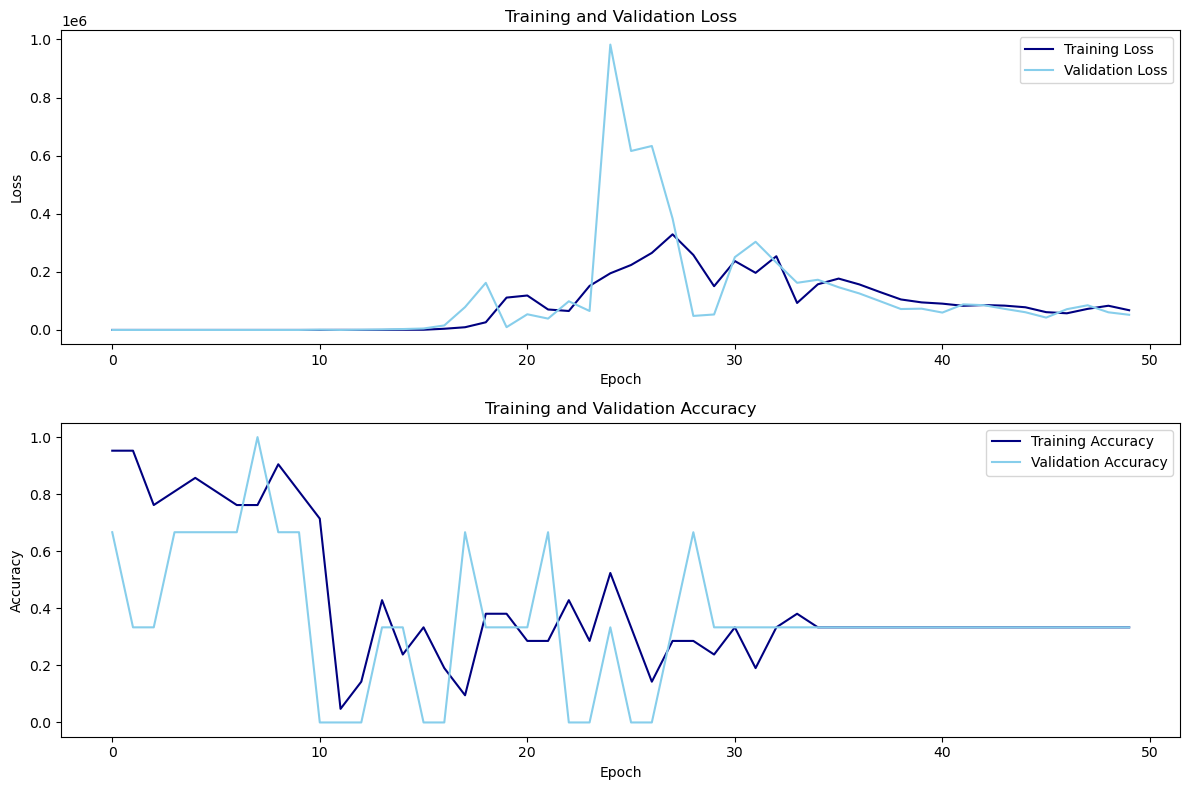

1/1 [==============================] - 1s 752ms/step
              precision    recall  f1-score   support

  jackhammer       0.33      1.00      0.50         1
     handhop       0.00      0.00      0.00         1
          cc       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3

Accuracy Score: 0.3333333333333333
Training Runtime:  00:03:35


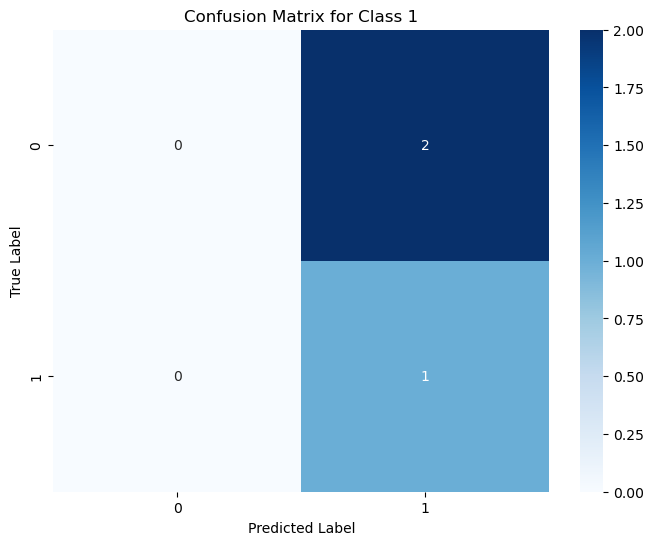

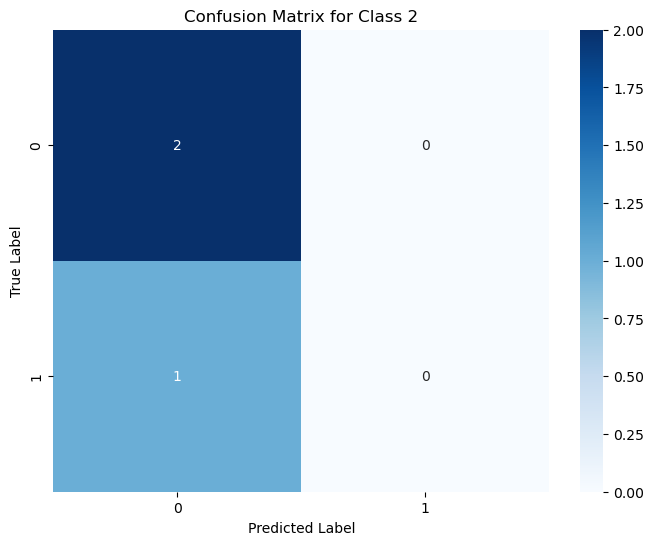

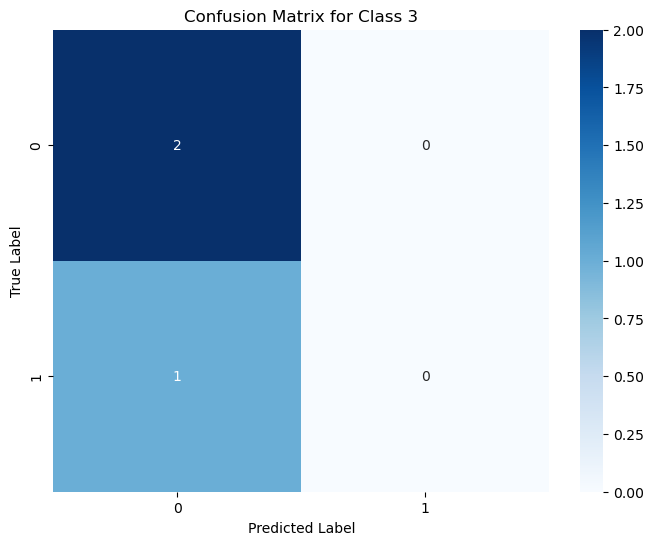

Model saved as C:\Users\Lua Yeow Wen\Documents\DSIF-SG-11\capstone\models\LSTM Model.keras


In [27]:
# Prepare the DataFrame to store results
model_result_lstm = pd.DataFrame(columns=['model', 'accuracy score', 'run time', 'saved model'])

# Run the function and update the DataFrame
#rnn_model_run(model_type, model_name, model_folder, model_result)
model, model_result_lstm = rnn_model_run(LSTM, 'LSTM Model', 'LSTM Model', model_result_lstm)

In [28]:
model_result_lstm

,model,accuracy score,run time,saved model
0,LSTM Model,0.333333,00:03:35,LSTM Model.keras


**Findings for Sequential LSTM Model:**

* The accuracy is 33.33%


* The accuracy plot shows high volatility for both training and validation which indicates that the model is not consistently improving its performance.



* There is a significant spike in validation loss around the 20th epoch, suggesting a moment of poor generalization to the validation set at that point. The model is experiencing some overfitting or instability during training.



* For class 1 confusion matrix, the model incorrectly predicted two other moves as 'jackhammer' (FP) but correctly identified one instances as not being 'jackhammer' (TN).

* For class 2 confusion matrix, the model correctly predicted two instance of 'handhop' (TP) but failed to identify one actual 'handhop' (FN).


* For class 3 confusion matrix, the model correctly predicted two instance of 'cc' (TP) but failed to identify one actual 'cc' (FN).


### Incorporate Regularization:  Dropout
* Explained in **Modelling** section.

In [29]:
def rnn_model_run_do(model_type, model_name, model_folder, model_result):

    # Build Model Function
    def build_model(hp):
        n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
        n_neurons = hp.Int("n_neurons", min_value=32, max_value=64)
        dropout_rate = hp.Choice('dropout_rate', values=[0.0, 0.2, 0.5])
        learning_rate = hp.Float("learning_rate", min_value=0.001, max_value=0.002, sampling="log")
        optimizer = hp.Choice("optimizer", values=["sgd", "adam"])

        if optimizer == "sgd":
            optimizer = SGD(learning_rate=learning_rate)
        else:
            optimizer = Adam(learning_rate=learning_rate)
            
        model = Sequential()

        # Add the first layer with input_shape
        model.add(model_type(n_neurons, return_sequences=n_hidden > 1, activation='relu', input_shape=(60, 60)))

        # Add other hidden layers and dropout
        for i in range(1, n_hidden):
            model.add(model_type(n_neurons, return_sequences=i < n_hidden - 1, activation='relu'))
            if dropout_rate > 0:
                model.add(Dropout(dropout_rate))

        model.add(Dense(moves.shape[0], activation="softmax"))
        model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["categorical_accuracy"])
        
        return model

    # Start the timer
    start_time = time.time()

    # Hyperparameter Tuning
    random_search_tuner = kt.RandomSearch(build_model,
                                          objective='val_categorical_accuracy',
                                          max_trials=10,
                                          directory='my_dir',
                                          project_name=model_folder,
                                          seed=42)

    random_search_tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

    # Get the Best Trial Summary
    best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
    print("\nBest Trial Summary:")
    best_trial.summary()

    # Get Best Model
    best_model = random_search_tuner.get_best_models(num_models=1)[0]

    # Print the summary of the best model
    print("\nSummary of the Best Model:")
    best_model.summary()

    # Training the Best Model
    history = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

    # Stop the timer and calculate runtime
    end_time = time.time()
    runtime_seconds = end_time - start_time
    hours = int(runtime_seconds // 3600)
    minutes = int((runtime_seconds % 3600) // 60)
    seconds = int(runtime_seconds % 60)
    formatted_runtime = f"{hours:02d}:{minutes:02d}:{seconds:02d}"

    # Plotting Loss and Accuracy
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='navy')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='skyblue')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(history.history['categorical_accuracy'], label='Training Accuracy', color='navy')
    plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy', color='skyblue')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Predictions and Model Evaluation
    y_pred = best_model.predict(X_test)
    y_true = np.argmax(y_test, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    val_accuracy = accuracy_score(y_true, y_pred)
    print(classification_report(y_true, y_pred, target_names=moves, zero_division=0))
    print("Accuracy Score:", val_accuracy)
    print("Training Runtime: ", formatted_runtime)

    # Confusion Matrices
    confusion_matrices = multilabel_confusion_matrix(y_true, y_pred)
    num_classes = confusion_matrices.shape[0]

    for i in range(num_classes):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for Class {i+1}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    # Save Model
    model_save_filename = f"{model_name}.keras"
    model_save_path = os.path.join(save_model_path, model_save_filename)
    best_model.save(model_save_path)
    print(f"Model saved as {model_save_path}")

    # Append results to model_result DataFrame
    new_row = pd.DataFrame({
        'model': [model_name],
        'accuracy score': [val_accuracy],
        'run time': [formatted_runtime],  # Includes formatted runtime
        'saved model': [model_name + '.keras']
    })
    model_result = pd.concat([model_result, new_row], ignore_index=True)

    return best_model, model_result

### Sequential GRU Model with Dropout Regularization

Trial 10 Complete [00h 00m 07s]
val_categorical_accuracy: 0.3333333432674408

Best val_categorical_accuracy So Far: 1.0
Total elapsed time: 00h 02m 30s

Best Trial Summary:
Trial 00 summary
Hyperparameters:
n_hidden: 5
n_neurons: 33
dropout_rate: 0.2
learning_rate: 0.0012073763225913872
optimizer: adam
Score: 1.0

Summary of the Best Model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 33)            9405      
                                                                 
 gru_1 (GRU)                 (None, 60, 33)            6732      
                                                                 
 dropout (Dropout)           (None, 60, 33)            0         
                                                                 
 gru_2 (GRU)                 (None, 60, 33)            6732      
                                           

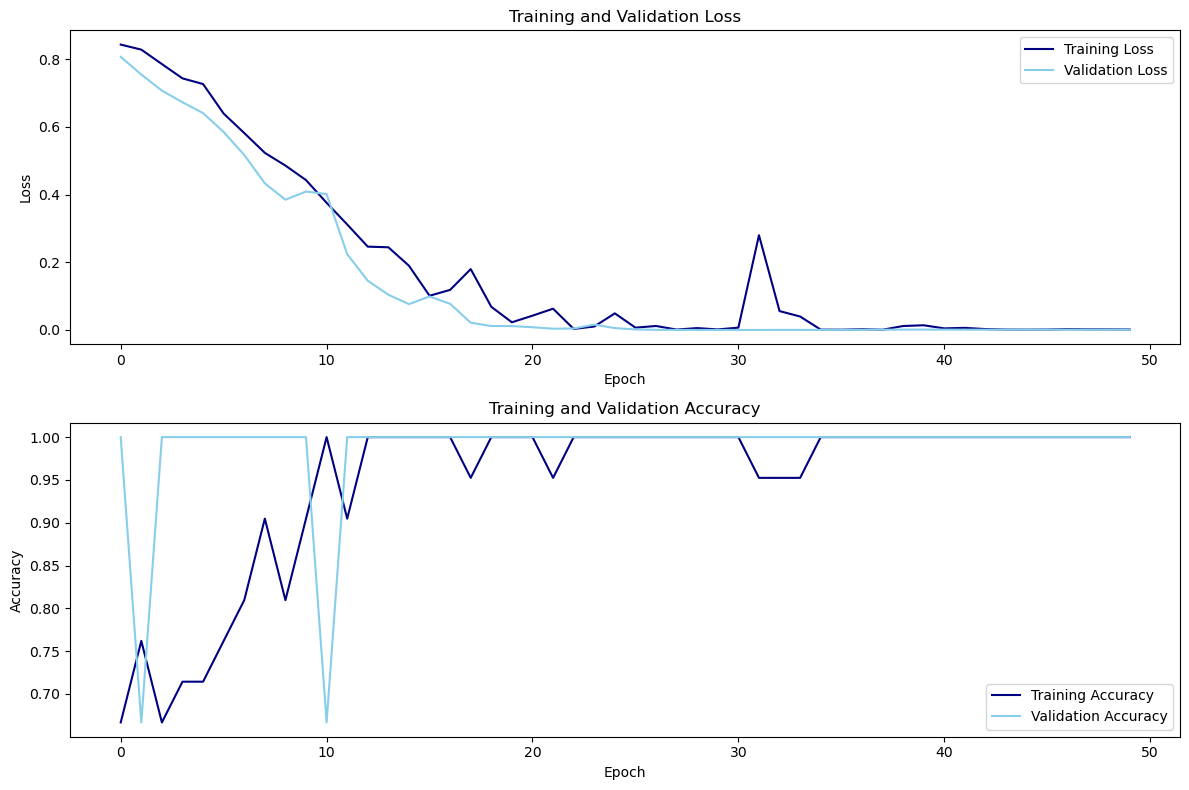

1/1 [==============================] - 2s 2s/step
              precision    recall  f1-score   support

  jackhammer       1.00      1.00      1.00         1
     handhop       1.00      1.00      1.00         1
          cc       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Accuracy Score: 1.0
Training Runtime:  00:02:53


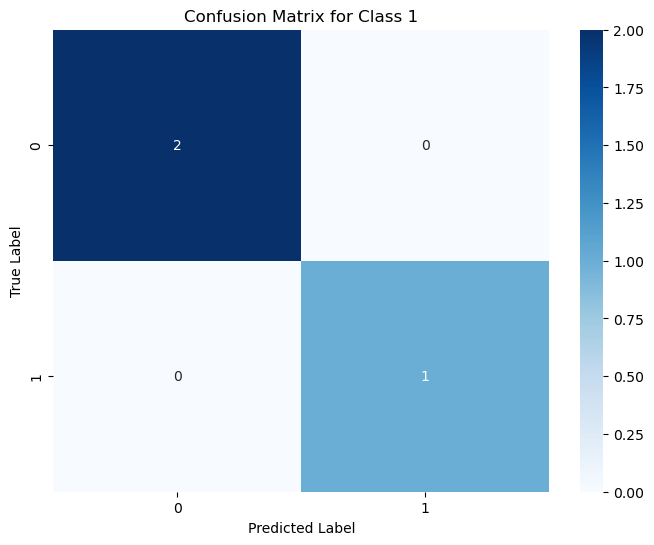

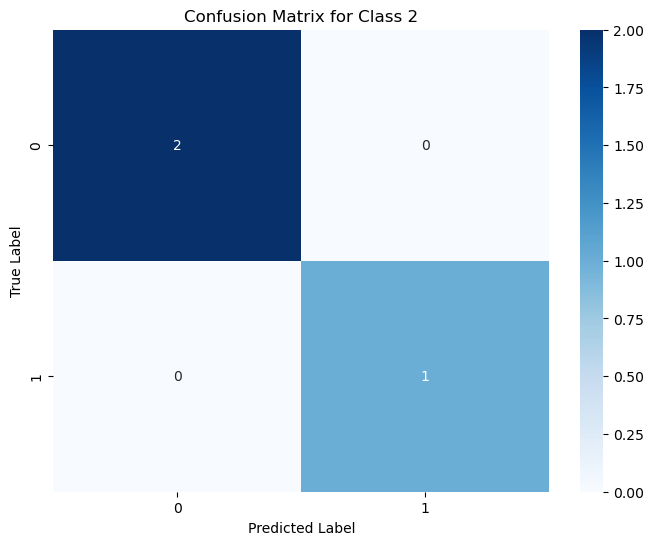

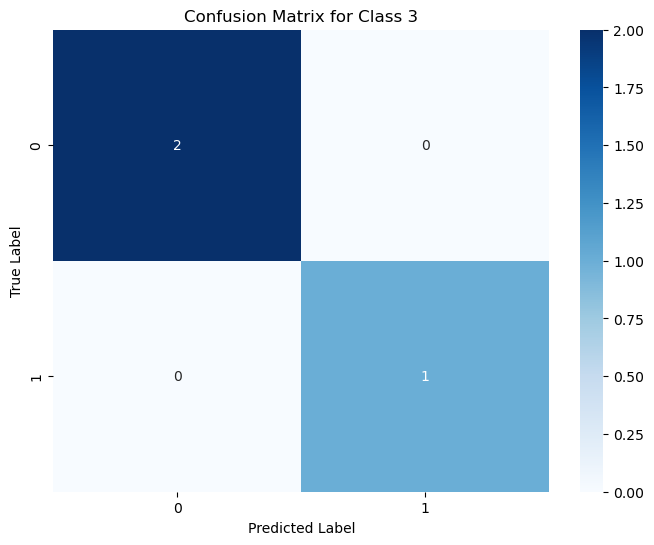

Model saved as C:\Users\Lua Yeow Wen\Documents\DSIF-SG-11\capstone\models\GRU Model DO.keras


In [30]:
# Prepare the DataFrame to store results
model_result_gru_do = pd.DataFrame(columns=['model', 'accuracy score', 'run time', 'saved model'])

# Run the function and update the DataFrame
#rnn_model_run(model_type, model_name, model_folder, model_result)
model, model_result_gru_do = rnn_model_run_do(GRU, 'GRU Model DO', 'GRU Model DO', model_result_gru_do)

In [31]:
model_result_gru_do

,model,accuracy score,run time,saved model
0,GRU Model DO,1.0,00:02:53,GRU Model DO.keras


**Findings for Sequential GRU Model with Dropout Regularization:**


* The accuracy is 100%

* There are some fluctuations seen in the accuracy plot but stablized near the end with high accuracy for both training and validation.


* The loss for both training and validation decreases over epochs, suggesting that the model is learning and improving its prediction over time. The training and validation loss lines are close together near the end, but there are some fluctuations in the training line at the 30th epoch. The model is generalizing well and not too overfitting.


* All 3 classes of confusion matrix shows perfect accuracy results with 2 true negatives and 1 true positive.

### Sequential LSTM Model with Dropout Regularization

Trial 10 Complete [00h 00m 09s]
val_categorical_accuracy: 0.3333333432674408

Best val_categorical_accuracy So Far: 1.0
Total elapsed time: 00h 02m 42s

Best Trial Summary:
Trial 00 summary
Hyperparameters:
n_hidden: 5
n_neurons: 33
dropout_rate: 0.2
learning_rate: 0.0012073763225913872
optimizer: adam
Score: 1.0

Summary of the Best Model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 33)            12408     
                                                                 
 lstm_1 (LSTM)               (None, 60, 33)            8844      
                                                                 
 dropout (Dropout)           (None, 60, 33)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 33)            8844      
                                           

Epoch 38/50
1/1 [==============================] - 0s 130ms/step - loss: 0.6328 - categorical_accuracy: 0.8095 - val_loss: 0.5947 - val_categorical_accuracy: 1.0000
Epoch 39/50
1/1 [==============================] - 0s 133ms/step - loss: 0.5672 - categorical_accuracy: 0.8095 - val_loss: 0.5513 - val_categorical_accuracy: 1.0000
Epoch 40/50
1/1 [==============================] - 0s 144ms/step - loss: 1.2504 - categorical_accuracy: 0.6667 - val_loss: 0.5798 - val_categorical_accuracy: 1.0000
Epoch 41/50
1/1 [==============================] - 0s 139ms/step - loss: 0.5533 - categorical_accuracy: 0.7619 - val_loss: 0.6251 - val_categorical_accuracy: 0.6667
Epoch 42/50
1/1 [==============================] - 0s 134ms/step - loss: 0.6096 - categorical_accuracy: 0.7143 - val_loss: 0.6875 - val_categorical_accuracy: 0.6667
Epoch 43/50
1/1 [==============================] - 0s 133ms/step - loss: 0.6143 - categorical_accuracy: 0.8095 - val_loss: 0.6941 - val_categorical_accuracy: 0.6667
Epoch 44/5

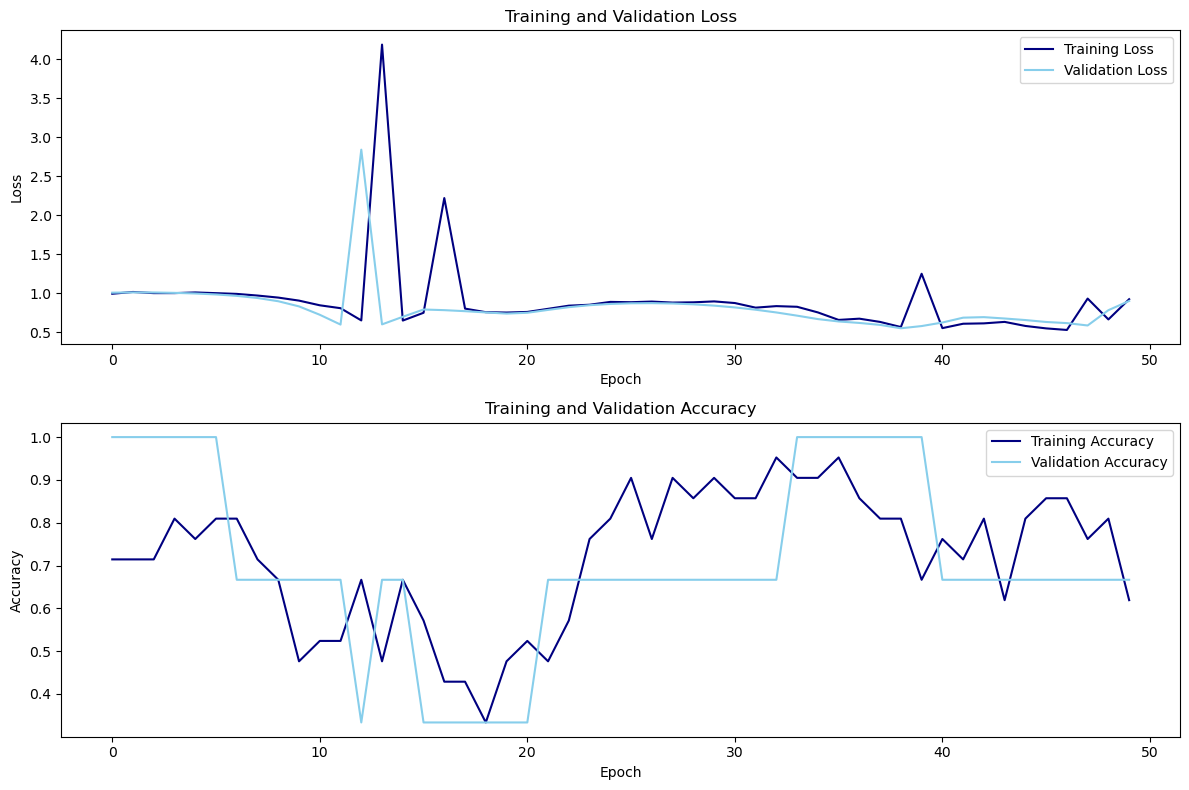

1/1 [==============================] - 1s 877ms/step
              precision    recall  f1-score   support

  jackhammer       0.50      1.00      0.67         1
     handhop       1.00      1.00      1.00         1
          cc       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3

Accuracy Score: 0.6666666666666666
Training Runtime:  00:03:03


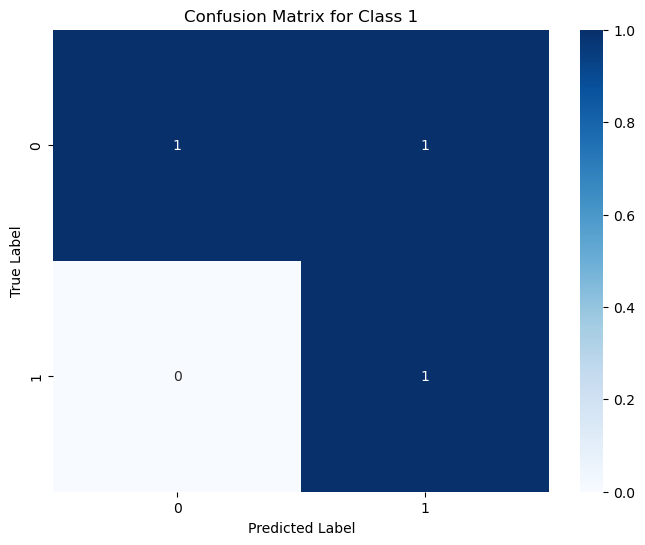

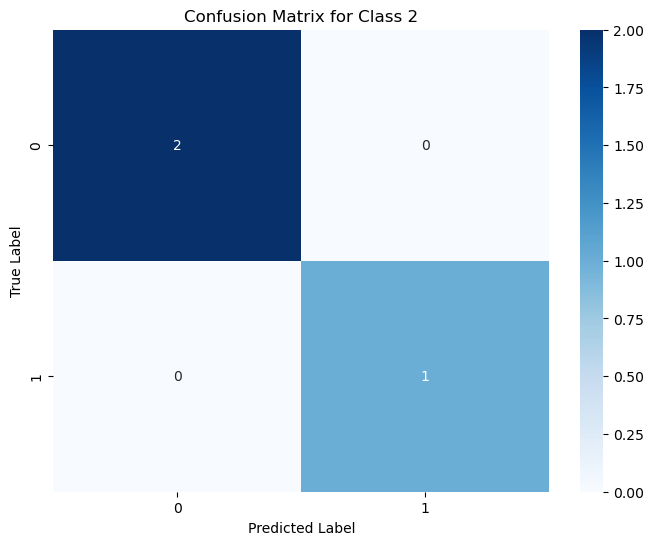

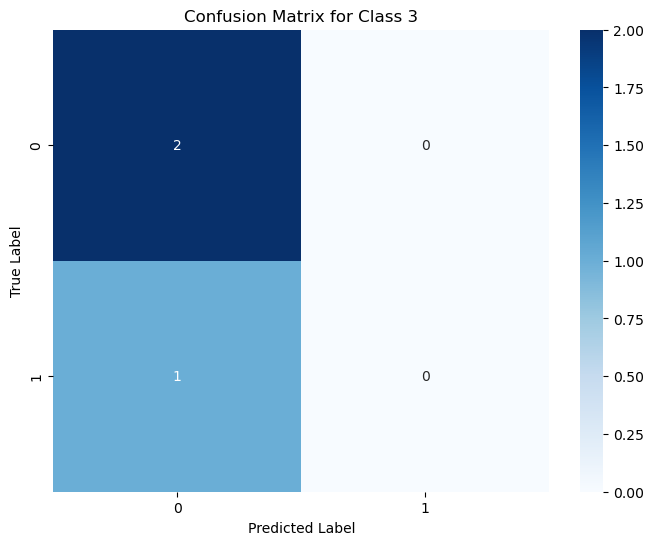

Model saved as C:\Users\Lua Yeow Wen\Documents\DSIF-SG-11\capstone\models\LSTM Model DO.keras


In [32]:
# Prepare the DataFrame to store results
model_result_lstm_do = pd.DataFrame(columns=['model', 'accuracy score', 'run time', 'saved model'])

# Run the function and update the DataFrame
#rnn_model_run(model_type, model_name, model_folder, model_result)
model, model_result_lstm_do = rnn_model_run_do(LSTM, 'LSTM Model DO', 'LSTM Model DO', model_result_lstm_do)

In [33]:
model_result_lstm_do

,model,accuracy score,run time,saved model
0,LSTM Model DO,0.666667,00:03:03,LSTM Model DO.keras


**Findings for Sequential LSTM Model with Dropout Regularization:**

* The accuracy is 66.67%

* There are some fluctuations seen in the accuracy plot and both training and validation lines are not converging well which shows signs of overfitting.


* The loss for both training and validation are close together but increases towards the end.



* For class 1 confusion matrix, the model incorrectly predicted one other move as 'jackhammer' (FP) but correctly identified one instances as not being 'jackhammer' (TN) and correctly predicted one instances as 'jackhammer' (TP) .



* class 2 confusion matrix shows perfect accuracy results with 2 true negatives and 1 true positive.

* For class 3 confusion matrix, the model correctly predicted two other move as 'cc' (TP) but incorrectly identified one instances as 'cc' (FN).

### Incorporate Regularization:  EarlyStopping Regularization
* Explained in **Modelling** section.

In [34]:
def rnn_model_run_es(model_type, model_name, model_folder, model_result):


    # Build Model Function
    def build_model(hp):
        n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
        n_neurons = hp.Int("n_neurons", min_value=32, max_value=64)
        learning_rate = hp.Float("learning_rate", min_value=0.001, max_value=0.002, sampling="log")
        optimizer = hp.Choice("optimizer", values=["sgd", "adam"])

        if optimizer == "sgd":
            optimizer = SGD(learning_rate=learning_rate)
        else:
            optimizer = Adam(learning_rate=learning_rate)
            
        model = Sequential()

        # Add the first layer with input_shape
        model.add(model_type(n_neurons, return_sequences=n_hidden > 1, activation='relu', input_shape=(60, 60)))

        # Add subsequent layers without specifying input_shape
        for i in range(1, n_hidden):
            model.add(model_type(n_neurons, return_sequences=i < n_hidden - 1, activation='relu'))

        model.add(Dense(moves.shape[0], activation="softmax"))
        model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["categorical_accuracy"])
        
        return model

    # EarlyStopping setup
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

    # Start the timer
    start_time = time.time()

    # Hyperparameter Tuning
    random_search_tuner = kt.RandomSearch(build_model,
                                          objective='val_categorical_accuracy',
                                          max_trials=10,
                                          directory='my_dir',
                                          project_name=model_folder,
                                          seed=42)

    random_search_tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

    # Get the Best Trial Summary
    best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
    print("\nBest Trial Summary:")
    best_trial.summary()

    # Get Best Model
    best_model = random_search_tuner.get_best_models(num_models=1)[0]

    # Print the summary of the best model
    print("\nSummary of the Best Model:")
    best_model.summary()

    # Training the Best Model with EarlyStopping
    history = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stopping])

    # Stop the timer and calculate runtime
    end_time = time.time()
    runtime_seconds = end_time - start_time
    hours = int(runtime_seconds // 3600)
    minutes = int((runtime_seconds % 3600) // 60)
    seconds = int(runtime_seconds % 60)
    formatted_runtime = f"{hours:02d}:{minutes:02d}:{seconds:02d}"

    # Plotting Loss and Accuracy
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='navy')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='skyblue')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(history.history['categorical_accuracy'], label='Training Accuracy', color='navy')
    plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy', color='skyblue')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Predictions and Model Evaluation
    y_pred = best_model.predict(X_test)
    y_true = np.argmax(y_test, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    val_accuracy = accuracy_score(y_true, y_pred)
    print(classification_report(y_true, y_pred, target_names=moves, zero_division=0))
    print("Accuracy Score:", val_accuracy)
    print("Training Runtime: ", formatted_runtime)

    # Confusion Matrices
    confusion_matrices = multilabel_confusion_matrix(y_true, y_pred)
    num_classes = confusion_matrices.shape[0]

    for i in range(num_classes):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for Class {i+1}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    # Save Model
    model_save_filename = f"{model_name}.keras"
    model_save_path = os.path.join(save_model_path, model_save_filename)
    best_model.save(model_save_path)
    print(f"Model saved as {model_save_path}")

    # Append results to model_result DataFrame
    new_row = pd.DataFrame({
        'model': [model_name],
        'accuracy score': [val_accuracy],
        'run time': [formatted_runtime],
        'saved model': [model_name + '.keras']
    })
    model_result = pd.concat([model_result, new_row], ignore_index=True)

    return best_model, model_result

### Sequential GRU Model with EarlyStopping Regularization

Trial 10 Complete [00h 00m 26s]
val_categorical_accuracy: 1.0

Best val_categorical_accuracy So Far: 1.0
Total elapsed time: 00h 03m 46s

Best Trial Summary:
Trial 02 summary
Hyperparameters:
n_hidden: 4
n_neurons: 40
learning_rate: 0.001970217438765675
optimizer: adam
Score: 1.0

Summary of the Best Model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 40)            12240     
                                                                 
 gru_1 (GRU)                 (None, 60, 40)            9840      
                                                                 
 gru_2 (GRU)                 (None, 60, 40)            9840      
                                                                 
 gru_3 (GRU)                 (None, 40)                9840      
                                                                 
 dense (Den

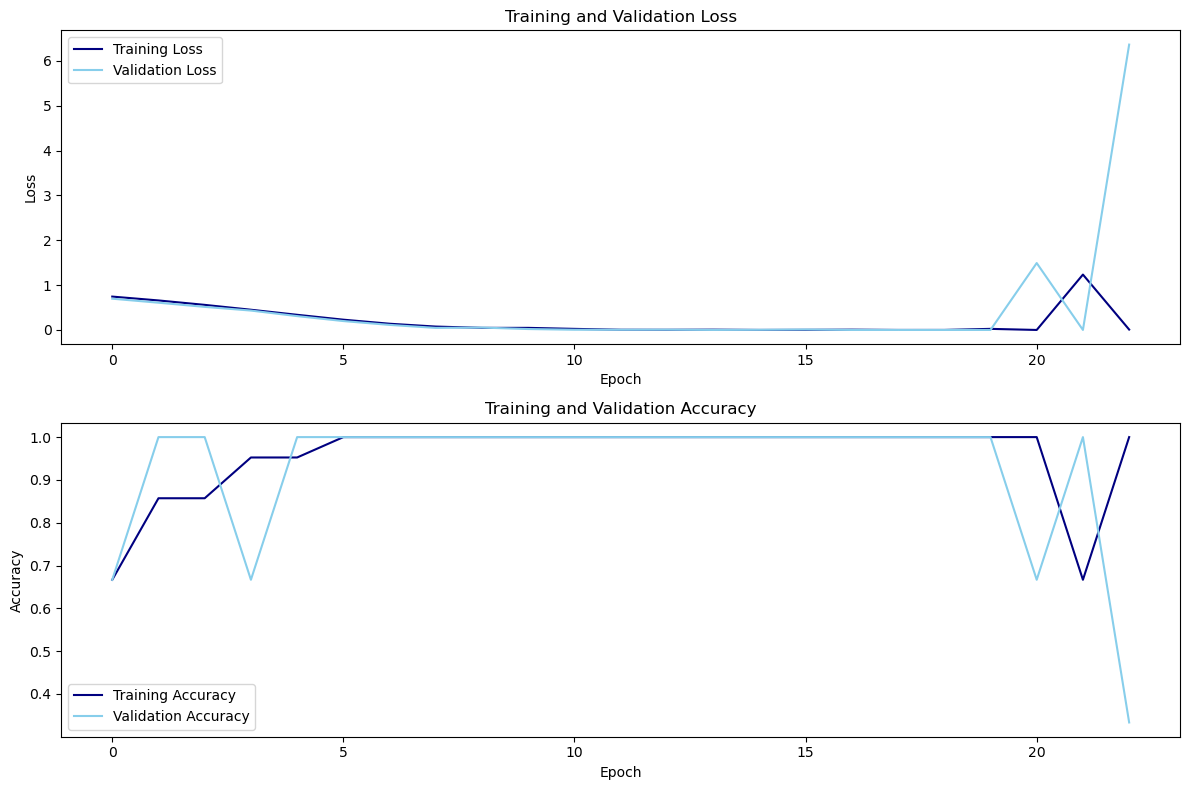

1/1 [==============================] - 1s 734ms/step
              precision    recall  f1-score   support

  jackhammer       1.00      1.00      1.00         1
     handhop       1.00      1.00      1.00         1
          cc       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Accuracy Score: 1.0
Training Runtime:  00:04:00


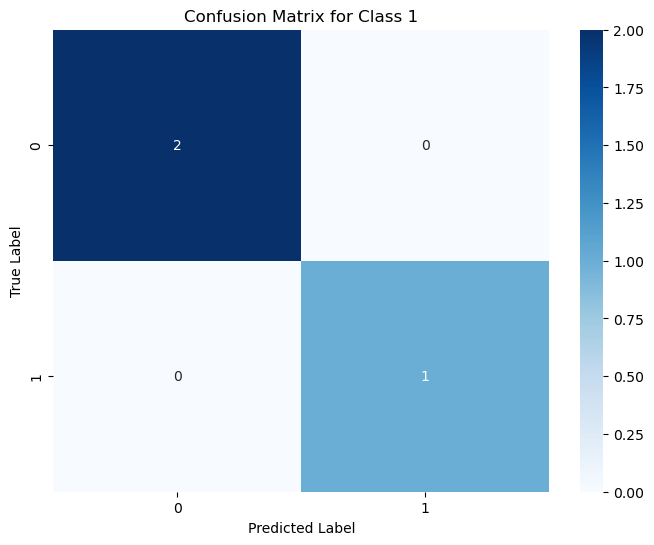

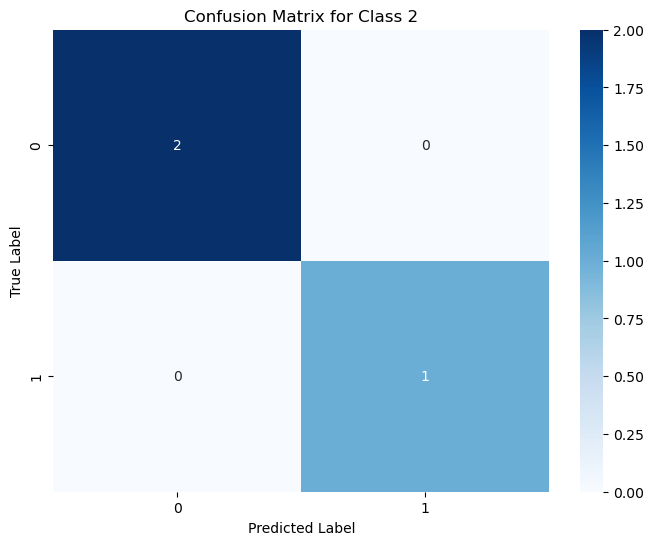

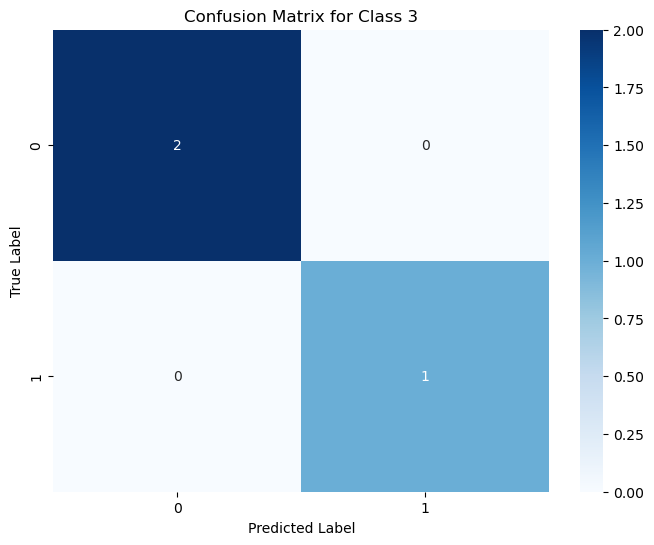

Model saved as C:\Users\Lua Yeow Wen\Documents\DSIF-SG-11\capstone\models\GRU Model ES.keras


In [35]:
# Example usage
model_result_gru_es = pd.DataFrame(columns=['model', 'accuracy score', 'run time', 'saved model'])
model, model_result_gru_es = rnn_model_run_es(GRU, 'GRU Model ES', 'GRU Model ES', model_result_gru_es)

In [36]:
model_result_gru_es

,model,accuracy score,run time,saved model
0,GRU Model ES,1.0,00:04:00,GRU Model ES.keras


**Findings for Sequential GRU Model with Earlystopping Regularization:**

* The accuracy is 100%

* There are fluctuations seen in the accuracy plot towards the end for both both training and validation, causing the lines to diverge.


* The loss for both training and validation are close together until the 20th epoch, causing the lines to diverge.


* All 3 classes of confusion matrix shows perfect accuracy results with 2 true negatives and 1 true positive.

### Sequential LSTM Model with EarlyStopping Regularization

Trial 10 Complete [00h 00m 29s]
val_categorical_accuracy: 1.0

Best val_categorical_accuracy So Far: 1.0
Total elapsed time: 00h 03m 54s

Best Trial Summary:
Trial 03 summary
Hyperparameters:
n_hidden: 8
n_neurons: 34
learning_rate: 0.0019533076411281467
optimizer: sgd
Score: 1.0

Summary of the Best Model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 34)            12920     
                                                                 
 lstm_1 (LSTM)               (None, 60, 34)            9384      
                                                                 
 lstm_2 (LSTM)               (None, 60, 34)            9384      
                                                                 
 lstm_3 (LSTM)               (None, 60, 34)            9384      
                                                                 
 lstm_4 (LS

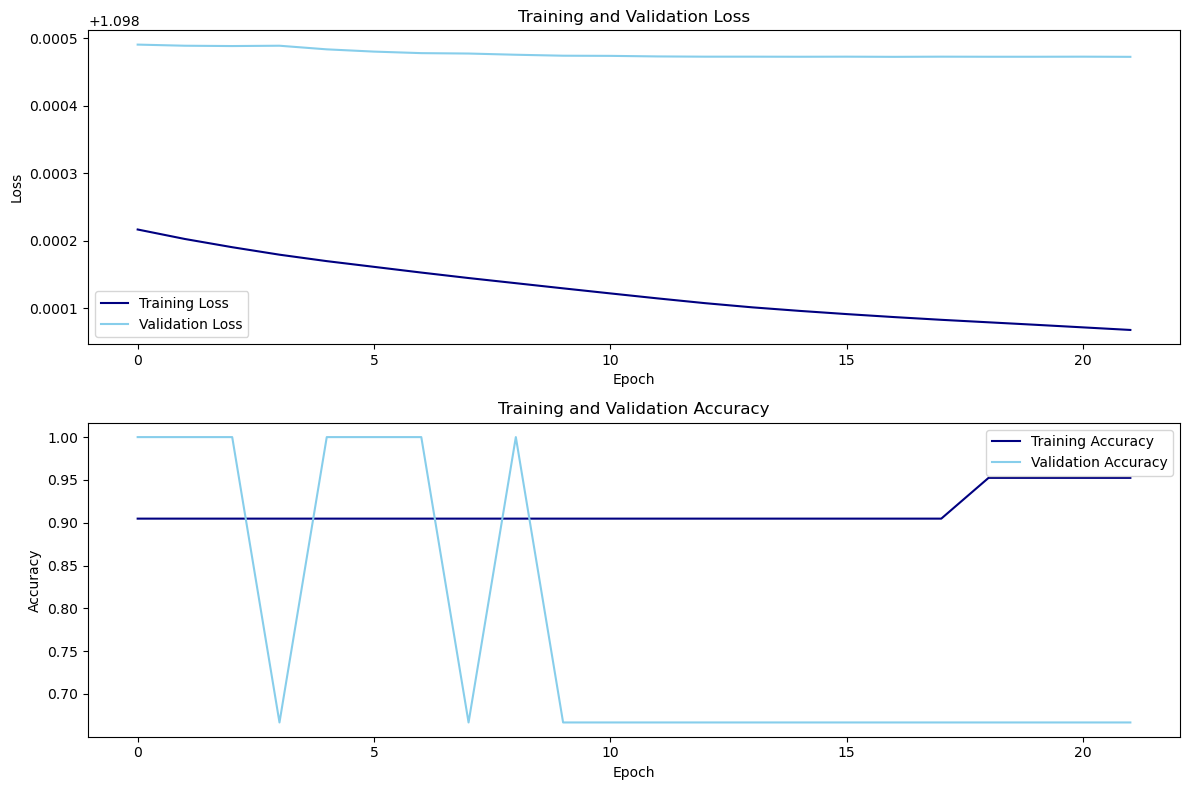

1/1 [==============================] - 2s 2s/step
              precision    recall  f1-score   support

  jackhammer       0.50      1.00      0.67         1
     handhop       0.00      0.00      0.00         1
          cc       1.00      1.00      1.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3

Accuracy Score: 0.6666666666666666
Training Runtime:  00:04:17


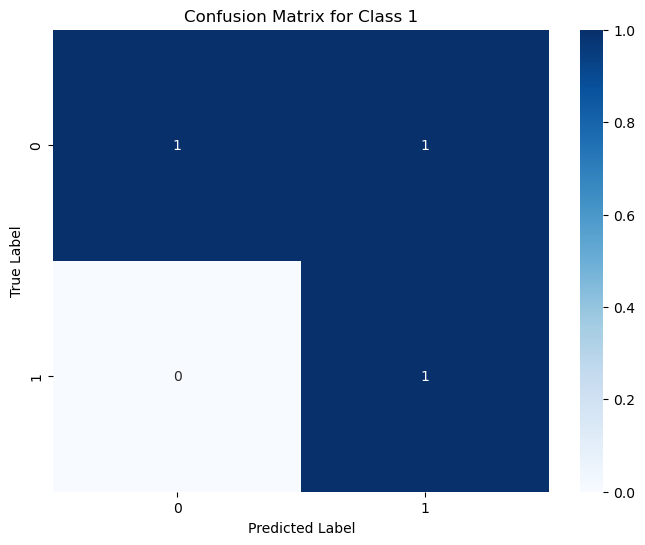

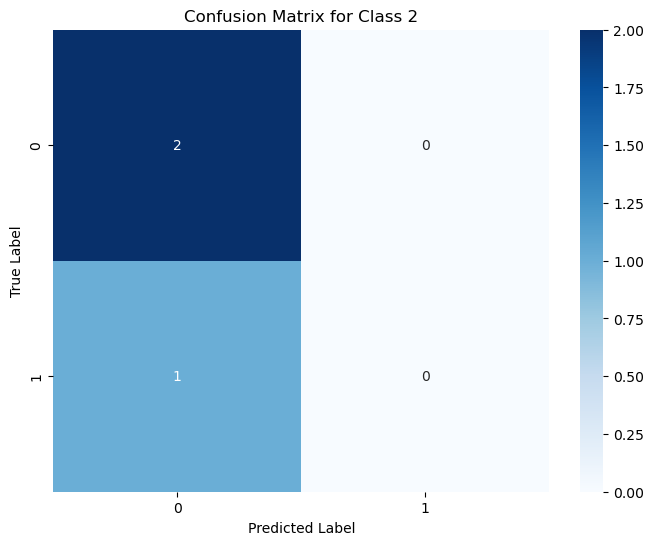

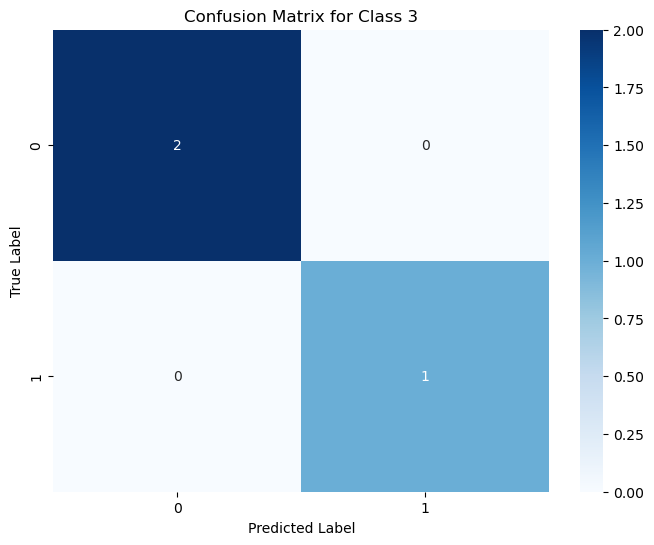

Model saved as C:\Users\Lua Yeow Wen\Documents\DSIF-SG-11\capstone\models\LSTM Model ES.keras


In [37]:
model_result_lstm_es = pd.DataFrame(columns=['model', 'accuracy score', 'run time', 'saved model'])
model, model_result_lstm_es = rnn_model_run_es(LSTM, 'LSTM Model ES', 'LSTM Model ES', model_result_lstm_es)

In [38]:
model_result_lstm_es

,model,accuracy score,run time,saved model
0,LSTM Model ES,0.666667,00:04:17,LSTM Model ES.keras


**Findings for Sequential LSTM Model with Earlystopping Regularization:**

* The accuracy is 66.67%

* There are fluctuations seen in the accuracy plot for validation but stablized at the end. However both training and validation lines were far apart, indicating that the model is overfitting.


* The loss for both training and validation lines were far apart, indicating that the model is overfitting.


* For class 1 confusion matrix, the model incorrectly predicted one move as 'jackhammer' (FP) but correctly identified one instances as not being 'jackhammer' (TN) and one instances for being 'jackhammer' (TP) .

* For class 2 confusion matrix, the model correctly predicted two instance of 'handhop' (TP) but failed to identify one actual 'handhop' (FN).

* Class 3 confusion matrix shows perfect accuracy results with 2 true negatives and 1 true positive.

### Incorporate Regularization:  Dropout and EarlyStopping Regularization
* Explained in **Modelling** section.

In [39]:
def rnn_model_run_do_es(model_type, model_name, model_folder, model_result):


    # Build Model Function
    def build_model(hp):
        n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
        n_neurons = hp.Int("n_neurons", min_value=32, max_value=64)
        dropout_rate = hp.Choice('dropout_rate', values=[0.0, 0.2, 0.5])
        learning_rate = hp.Float("learning_rate", min_value=0.001, max_value=0.002, sampling="log")
        optimizer = hp.Choice("optimizer", values=["sgd", "adam"])

        if optimizer == "sgd":
            optimizer = SGD(learning_rate=learning_rate)
        else:
            optimizer = Adam(learning_rate=learning_rate)
            
        model = Sequential()

        # Add the first layer with input_shape
        model.add(model_type(n_neurons, return_sequences=n_hidden > 1, activation='relu', input_shape=(60, 60)))

        # Add other hidden layers
        for i in range(1, n_hidden):
            model.add(model_type(n_neurons, return_sequences=i < n_hidden - 1, activation='relu'))
            if dropout_rate > 0:
                model.add(Dropout(dropout_rate))

        model.add(Dense(moves.shape[0], activation="softmax"))
        model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["categorical_accuracy"])
        
        return model

    # EarlyStopping setup
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

    # Start the timer
    start_time = time.time()

    # Hyperparameter Tuning
    random_search_tuner = kt.RandomSearch(build_model,
                                          objective='val_categorical_accuracy',
                                          max_trials=10,
                                          directory='my_dir',
                                          project_name=model_folder,
                                          seed=42)

    random_search_tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

    # Get the Best Trial Summary
    best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
    print("\nBest Trial Summary:")
    best_trial.summary()

    # Get Best Model
    best_model = random_search_tuner.get_best_models(num_models=1)[0]

    # Print the summary of the best model
    print("\nSummary of the Best Model:")
    best_model.summary()

    # Training the Best Model with EarlyStopping
    history = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stopping])

    # Stop the timer and calculate runtime
    end_time = time.time()
    runtime_seconds = end_time - start_time
    hours = int(runtime_seconds // 3600)
    minutes = int((runtime_seconds % 3600) // 60)
    seconds = int(runtime_seconds % 60)
    formatted_runtime = f"{hours:02d}:{minutes:02d}:{seconds:02d}"

    # Plotting Loss and Accuracy
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='navy')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='skyblue')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(history.history['categorical_accuracy'], label='Training Accuracy', color='navy')
    plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy', color='skyblue')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Predictions and Model Evaluation
    y_pred = best_model.predict(X_test)
    y_true = np.argmax(y_test, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    val_accuracy = accuracy_score(y_true, y_pred)
    print(classification_report(y_true, y_pred, target_names=moves, zero_division=0))
    print("Accuracy Score:", val_accuracy)
    print("Training Runtime: ", formatted_runtime)

    # Confusion Matrices
    confusion_matrices = multilabel_confusion_matrix(y_true, y_pred)
    num_classes = confusion_matrices.shape[0]

    for i in range(num_classes):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for Class {i+1}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    # Save Model
    model_save_filename = f"{model_name}.keras"
    model_save_path = os.path.join(save_model_path, model_save_filename)
    best_model.save(model_save_path)
    print(f"Model saved as {model_save_path}")

    # Append results to model_result DataFrame
    new_row = pd.DataFrame({
        'model': [model_name],
        'accuracy score': [val_accuracy],
        'run time': [formatted_runtime],
        'saved model': [model_name + '.keras']
    })
    model_result = pd.concat([model_result, new_row], ignore_index=True)

    return best_model, model_result

### Sequential GRU Model with Dropout and EarlyStopping Regularization

Trial 10 Complete [00h 00m 10s]
val_categorical_accuracy: 0.3333333432674408

Best val_categorical_accuracy So Far: 1.0
Total elapsed time: 00h 03m 00s

Best Trial Summary:
Trial 00 summary
Hyperparameters:
n_hidden: 5
n_neurons: 33
dropout_rate: 0.2
learning_rate: 0.0012073763225913872
optimizer: adam
Score: 1.0

Summary of the Best Model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 33)            9405      
                                                                 
 gru_1 (GRU)                 (None, 60, 33)            6732      
                                                                 
 dropout (Dropout)           (None, 60, 33)            0         
                                                                 
 gru_2 (GRU)                 (None, 60, 33)            6732      
                                           

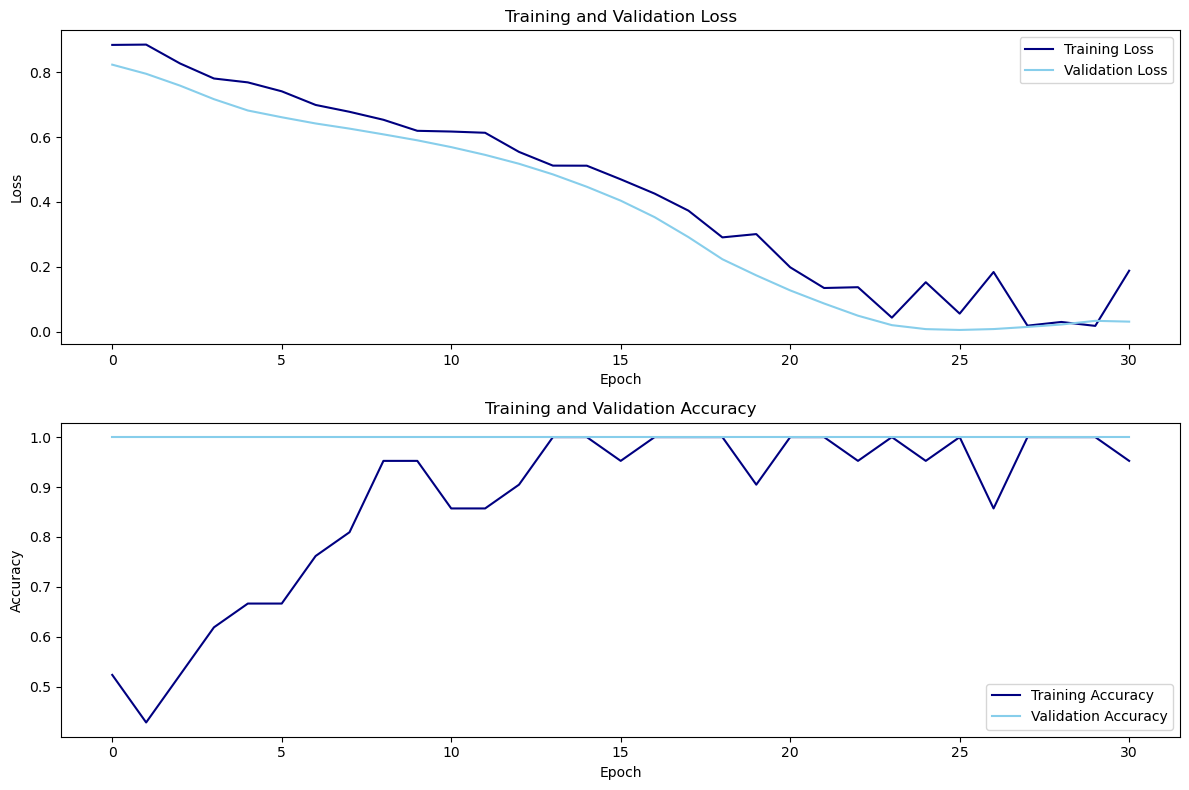

1/1 [==============================] - 1s 1s/step
              precision    recall  f1-score   support

  jackhammer       1.00      1.00      1.00         1
     handhop       1.00      1.00      1.00         1
          cc       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Accuracy Score: 1.0
Training Runtime:  00:03:19


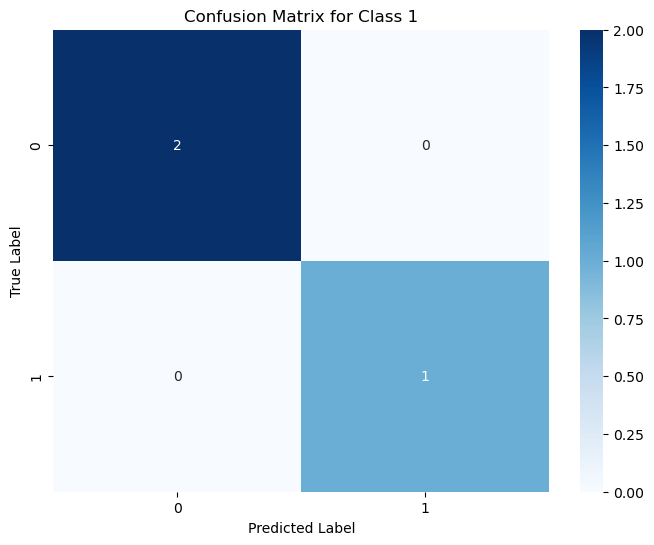

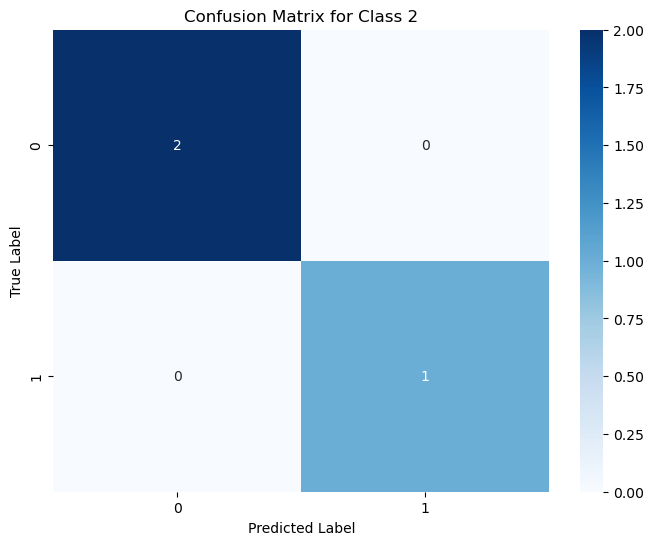

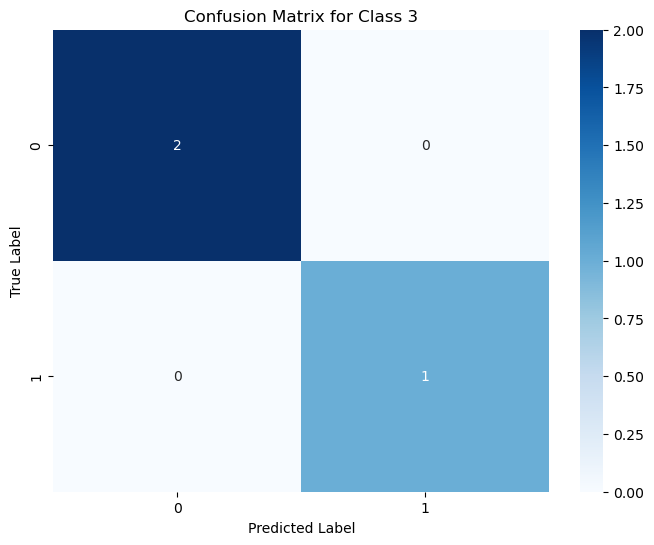

Model saved as C:\Users\Lua Yeow Wen\Documents\DSIF-SG-11\capstone\models\GRU Model DO and ES.keras


In [40]:
# rnn_model_run_do_es(model_type, model_name, model_folder, model_result)
model_result_gru_do_es = pd.DataFrame(columns=['model', 'accuracy score', 'run time', 'saved model'])
model, model_result_gru_do_es = rnn_model_run_do_es(GRU, 'GRU Model DO and ES', 'GRU Model DO and ES', model_result_gru_do_es)

In [41]:
model_result_gru_do_es

,model,accuracy score,run time,saved model
0,GRU Model DO and ES,1.0,00:03:19,GRU Model DO and ES.keras


**Findings for Sequential GRU Model with Dropout and Earlystopping Regularization:**

* The accuracy is 100%

* There are some fluctuations seen in the accuracy plot for both training and validation lines. The model does not seems to be too overfitting.

* There are some fluctuations seen in the loss plot for training lines. The model does not seems to be too overfitting.

* All 3 classes of confusion matrix shows perfect accuracy results with 2 true negatives and 1 true positive.

### Sequential LSTM Model with Dropout and EarlyStopping Regularization

Trial 10 Complete [00h 00m 11s]
val_categorical_accuracy: 0.6666666865348816

Best val_categorical_accuracy So Far: 1.0
Total elapsed time: 00h 03m 02s

Best Trial Summary:
Trial 00 summary
Hyperparameters:
n_hidden: 5
n_neurons: 33
dropout_rate: 0.2
learning_rate: 0.0012073763225913872
optimizer: adam
Score: 1.0

Summary of the Best Model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 33)            12408     
                                                                 
 lstm_1 (LSTM)               (None, 60, 33)            8844      
                                                                 
 dropout (Dropout)           (None, 60, 33)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 33)            8844      
                                           

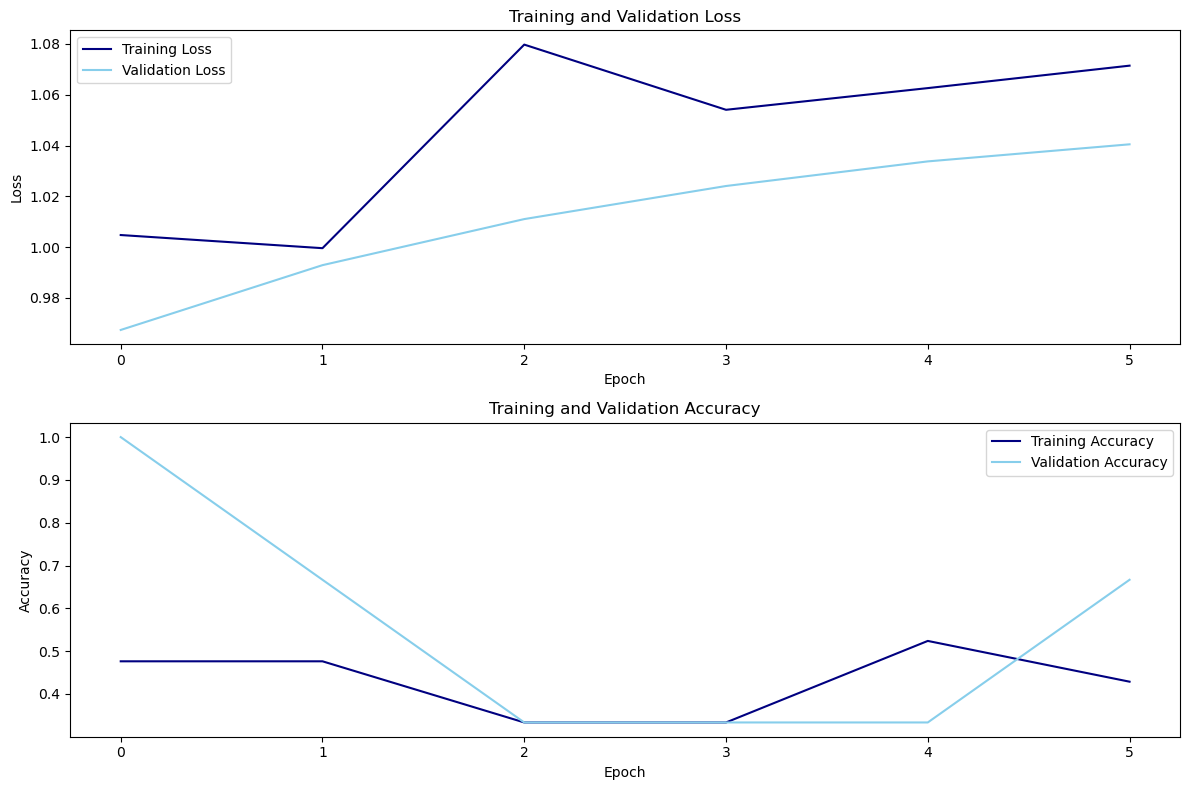

1/1 [==============================] - 1s 852ms/step
              precision    recall  f1-score   support

  jackhammer       1.00      1.00      1.00         1
     handhop       1.00      1.00      1.00         1
          cc       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Accuracy Score: 1.0
Training Runtime:  00:03:17


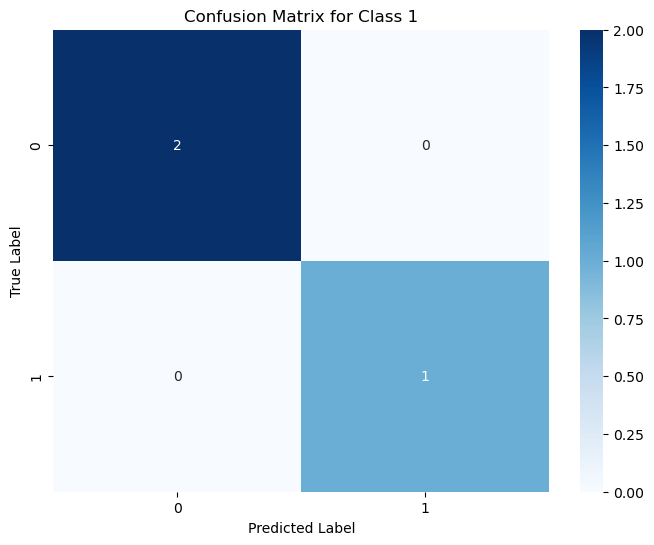

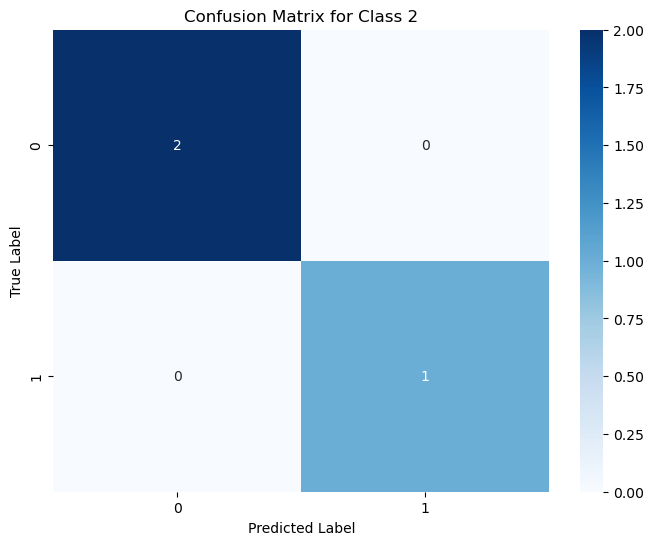

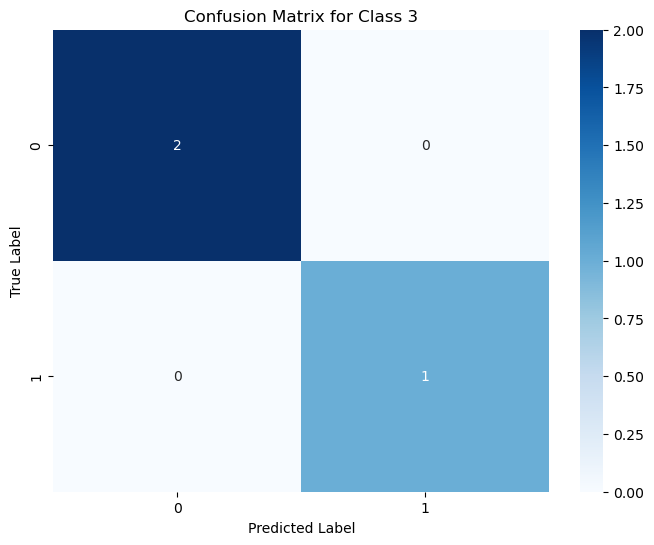

Model saved as C:\Users\Lua Yeow Wen\Documents\DSIF-SG-11\capstone\models\LSTM Model DO and ES.keras


In [42]:
# rnn_model_run_do_es(model_type, model_name, model_folder, model_result)
model_result_lstm_do_es = pd.DataFrame(columns=['model', 'accuracy score', 'run time', 'saved model'])
model, model_result_lstm_do_es = rnn_model_run_do_es(LSTM, 'LSTM Model DO and ES', 'LSTM Model DO and ES', model_result_lstm_do_es)

In [43]:
model_result_lstm_do_es

,model,accuracy score,run time,saved model
0,LSTM Model DO and ES,1.0,00:03:17,LSTM Model DO and ES.keras


**Findings for Sequential LSTM Model with Dropout and Earlystopping Regularization:**

* The accuracy is 100%

* The lines for both training and validation in the accuracy plot indicates that the model is overfitting.

* The loss for both training and validation lines were far apart, indicating that the model is overfitting.

* All 3 classes of confusion matrix shows perfect accuracy results with 2 true negatives and 1 true positive.

### Model Comparison

In [44]:
model_result_comparison = pd.DataFrame(columns=['model', 'accuracy score', 'run time', 'saved model'])

# Concatenate the DataFrames
model_result_comparison = pd.concat([
    model_result_gru,
    model_result_lstm,
    model_result_gru_do,
    model_result_lstm_do,
    model_result_gru_es,
    model_result_lstm_es,
    model_result_gru_do_es,
    model_result_lstm_do_es
], ignore_index=True)

In [45]:
model_result_comparison

,model,accuracy score,run time,saved model
0,GRU Model,1.000000,00:03:40,GRU Model.keras
1,LSTM Model,0.333333,00:03:35,LSTM Model.keras
2,GRU Model DO,1.000000,00:02:53,GRU Model DO.keras
3,LSTM Model DO,0.666667,00:03:03,LSTM Model DO.keras
4,GRU Model ES,1.000000,00:04:00,GRU Model ES.keras
5,LSTM Model ES,0.666667,00:04:17,LSTM Model ES.keras
6,GRU Model DO and ES,1.000000,00:03:19,GRU Model DO and ES.keras
7,LSTM Model DO and ES,1.000000,00:03:17,LSTM Model DO and ES.keras


In [46]:
def runtime_to_seconds(runtime_str):
    h, m, s = map(int, runtime_str.split(':'))
    return h * 3600 + m * 60 + s

# Apply the function to convert run time to seconds for sorting
model_result_comparison['run time seconds'] = model_result_comparison['run time'].apply(runtime_to_seconds)

# Sort by 'accuracy score' (descending) and then by 'run time seconds' (ascending)
model_result_comparison_sorted = model_result_comparison.sort_values(by=['accuracy score', 'run time seconds'], ascending=[False, True])

# Drop the auxiliary column if it's no longer needed
model_result_comparison_sorted = model_result_comparison_sorted.drop(columns=['run time seconds'])


In [47]:
# Display the sorted DataFrame
model_result_comparison_sorted

,model,accuracy score,run time,saved model
2,GRU Model DO,1.000000,00:02:53,GRU Model DO.keras
7,LSTM Model DO and ES,1.000000,00:03:17,LSTM Model DO and ES.keras
6,GRU Model DO and ES,1.000000,00:03:19,GRU Model DO and ES.keras
0,GRU Model,1.000000,00:03:40,GRU Model.keras
4,GRU Model ES,1.000000,00:04:00,GRU Model ES.keras
3,LSTM Model DO,0.666667,00:03:03,LSTM Model DO.keras
5,LSTM Model ES,0.666667,00:04:17,LSTM Model ES.keras
1,LSTM Model,0.333333,00:03:35,LSTM Model.keras


* **GRU Model DO (Sequential GRU Model with Dropout Regularization)** is chosen for identifies moves, assisting bboy judges in detecting instances of biting.

* Although it has the same accuracy as the base model (GRU Model AKA Sequential GRU Model) and might slightly overfit, but it still fits within the threshold of 10%. 

* The model trained almost a minute faster than the base model, providing it with a significant edge over the base model.

* All 3 classes of confusion matrix shows perfect accuracy results with 2 true negatives and 1 true positive.

### Conclusion
----

The project has successfully achieved its goals:

* The model accurately identifying moves to help bboy judges detect instances of biting. 

* This will assist corporations in selecting the right bboy or bgirl for potential sponsorship. 

* The fairness and rewarding incentives will encourage bboys and bgirls to create more original moves.

### Recomendation
----

* The marketing team of a company can utilize this model to identify dancers with exceptional originality for potential sponsorship opportunities.
* Dance competitions and events can utilize this model to provide judges with valuable insights, helping them assess the originality of performances. Just like VAR system in soccer matches to detect fouls.

### Further Improvements
----

* Incorporate videos captured from various angles.
* Diversify move durations during execution.
* Extend the dance moves database to encompass various hip-hop styles, including popping and locking.
* Develop a user-friendly app for bboys and bgirls, encouraging the creation of original dance moves.